In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../")
import csiborgtools

%matplotlib widget 
%load_ext autoreload
%autoreload 2

In [2]:
paths = csiborgtools.read.CSiBORGPaths(**csiborgtools.paths_glamdring)
partreader = csiborgtools.read.ParticleReader(paths)


nsim = 7444
nsnap = max(paths.get_snapshots(nsim))
box = csiborgtools.read.BoxUnits(nsnap, nsim, paths)

particle_archive = np.load(paths.split_path(nsnap, nsim))
clumpsarr = partreader.read_clumps(nsnap, nsim, cols=["index", 'x', 'y', 'z'])
clumpid2arrpos = {ind: ii for ii, ind in enumerate(clumpsarr["index"])}

In [8]:
nsim = 7492
cat = csiborgtools.read.ClumpsCatalogue(nsim, paths)

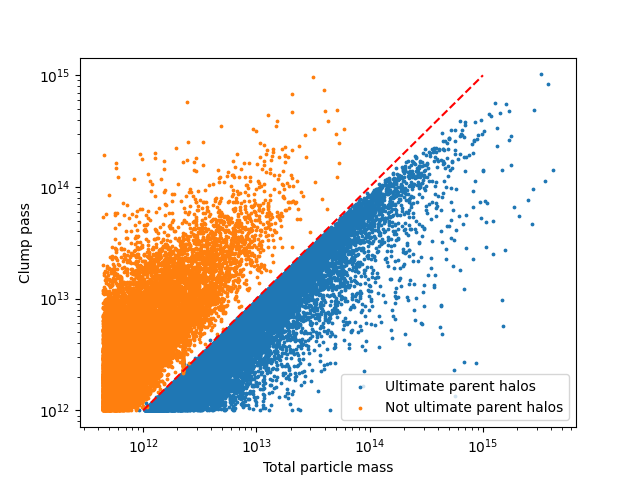

In [9]:
ismain = cat.ismain

plt.figure()
plt.scatter(cat['totpartmass'][ismain], cat['mass_cl'][ismain], s=3, label="Ultimate parent halos")
plt.scatter(cat['totpartmass'][~ismain], cat['mass_cl'][~ismain], s=3, label="Not ultimate parent halos")


t = np.linspace(1e12, 1e15, 1000)
plt.plot(t, t, c="red", ls="--")
plt.xlabel("Total particle mass")
plt.ylabel("Clump pass")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.show()